In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)

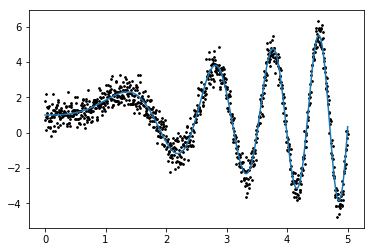

In [3]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [4]:
X.shape, y.shape

((1000,), (1000,))

In [5]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

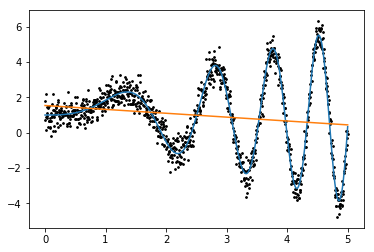

In [7]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   5.00500501e-03,   2.50500751e-05],
       [  1.00000000e+00,   1.00100100e-02,   1.00200300e-04],
       [  1.00000000e+00,   1.50150150e-02,   2.25450676e-04],
       [  1.00000000e+00,   2.00200200e-02,   4.00801202e-04],
       [  1.00000000e+00,   2.50250250e-02,   6.26251878e-04],
       [  1.00000000e+00,   3.00300300e-02,   9.01802704e-04],
       [  1.00000000e+00,   3.50350350e-02,   1.22745368e-03],
       [  1.00000000e+00,   4.00400400e-02,   1.60320481e-03],
       [  1.00000000e+00,   4.50450450e-02,   2.02905608e-03]])

In [9]:
lr = LinearRegression()
lr.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

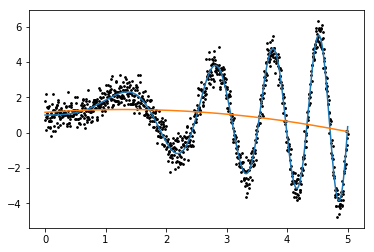

In [10]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [11]:
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   5.00500501e-03,   2.50500751e-05,
          1.25375751e-07,   6.27506263e-10,   3.14067198e-12,
          1.57190790e-14,   7.86740691e-17,   3.93764110e-19,
          1.97079134e-21,   9.86382051e-24,   4.93684710e-26,
          2.47089445e-28,   1.23668391e-30,   6.18960915e-33,
          3.09790248e-35,   1.55050174e-37],
       [  1.00000000e+00,   1.00100100e-02,   1.00200300e-04,
          1.00300601e-06,   1.00401002e-08,   1.00501504e-10,
          1.00602106e-12,   1.00702808e-14,   1.00803612e-16,
          1.00904517e-18,   1.01005522e-20,   1.01106629e-22,
          1.01207837e-24,   1.01309146e-26

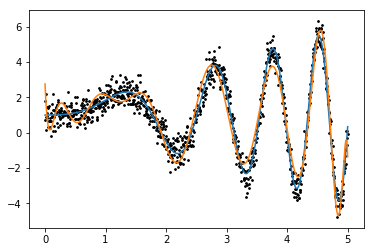

In [12]:
lr = LinearRegression()
lr.fit(X_poly,y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [13]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [14]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso()
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge()
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.005234709578088e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.8595943931379486e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6

In [15]:
import pandas as pd
from pandas import DataFrame
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lasso_rmse,lr_rmse,ridge_rmse
poly_range,,,
10,2.224381,1.906550,1.931693
11,2.233991,1.896033,1.910945
12,2.239936,1.619769,1.908789
13,2.243362,1.350054,1.877234
14,2.245428,1.339721,1.693436
15,2.246629,0.925134,1.473913
16,2.247219,0.711797,1.532958
17,2.247352,0.675025,1.290806
18,2.247146,0.705728,0.883518


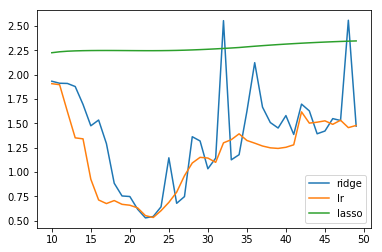

In [16]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [17]:
df.min()

lasso_rmse    2.224381
lr_rmse       0.531864
ridge_rmse    0.527506
dtype: float64

In [18]:
df["ridge_rmse"].sort_values().head()

poly_range
22    0.527506
23    0.542343
21    0.616522
24    0.641717
26    0.677486
Name: ridge_rmse, dtype: float64

In [19]:
poly_features = PolynomialFeatures(degree=22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

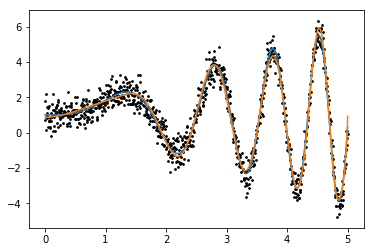

In [20]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

# Exercises problem

data from - https://onlinecourses.science.psu.edu/stat501/node/325

In [21]:
df = pd.read_csv("yield.csv",sep="\t")
df.head()

,i,Temp,Yield
0,1,50,3.3
1,2,50,2.8
2,3,50,2.9
3,4,70,2.3
4,5,70,2.6


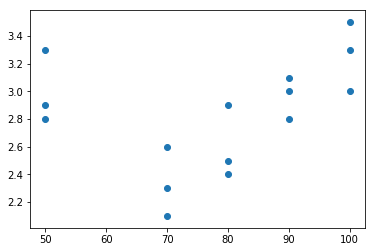

In [22]:
plt.scatter(df["Temp"], df["Yield"])
plt.show()